In [ ]:
#import Data
import pandas as pd

In [ ]:
training_df = pd.DataFrame()
training_df = pd.read_csv("https://github.com/Raymond474/CarPrice/raw/main/DontGetKicked/training.csv")
print(training_df.shape)
training_df = training_df.dropna(axis = 0) #used to remove rows with NaN values. However it makes the dataset fo from 72,983 data samples to 3276.
print(training_df.shape)
training_df.head()

(72983, 34)
(3276, 34)


,RefId,IsBadBuy,PurchDate,Auction,VehYear,VehicleAge,Make,Model,Trim,SubModel,...,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,PRIMEUNIT,AUCGUART,BYRNO,VNZIP1,VNST,VehBCost,IsOnlineSale,WarrantyCost
275,276,0,10/4/2010,ADESA,2003,7,HYUNDAI,ACCENT,GL,4D SEDAN GL,...,5332.0,6887.0,NO,GREEN,5546,33619,FL,4500.0,0,1054
290,291,0,10/11/2010,ADESA,2005,5,CHEVROLET,1500 SILVERADO PICKU,Bas,REG CAB 4.3L,...,9264.0,11033.0,NO,GREEN,19638,33619,FL,7100.0,0,905
297,298,0,10/18/2010,ADESA,2006,4,CHEVROLET,EQUINOX FWD V6,LS,4D SUV LS,...,11543.0,13228.0,NO,GREEN,5546,33619,FL,8950.0,0,1215
305,306,0,10/25/2010,ADESA,2004,6,CHRYSLER,PT CRUISER,Bas,4D SEDAN,...,6691.0,7438.0,NO,GREEN,5546,33619,FL,4600.0,0,1389
314,315,0,10/25/2010,ADESA,2002,8,MERCURY,SABLE,LS,4D SEDAN LS PREMIUM,...,5816.0,6883.0,NO,GREEN,5546,33619,FL,4200.0,0,1353


In [ ]:
testing_df = pd.DataFrame()
testing_df = pd.read_csv("https://github.com/Raymond474/CarPrice/raw/main/DontGetKicked/test.csv")

testing_df.head()

,RefId,PurchDate,Auction,VehYear,VehicleAge,Make,Model,Trim,SubModel,Color,...,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,PRIMEUNIT,AUCGUART,BYRNO,VNZIP1,VNST,VehBCost,IsOnlineSale,WarrantyCost
0,73015,12/2/2009,ADESA,2005,4,PONTIAC,GRAND PRIX,Bas,4D SEDAN,SILVER,...,8557.0,9752.0,NaN,NaN,18881,30212,GA,6500.0,0,2152
1,73016,12/2/2009,ADESA,2005,4,CHEVROLET,MALIBU V6,LS,4D SEDAN LS,SILVER,...,7562.0,9296.0,NaN,NaN,18111,30212,GA,6300.0,0,1118
2,73017,12/2/2009,ADESA,2006,3,DODGE,DURANGO 2WD V8,Adv,4D SUV 4.7L ADVENTURER,SILVER,...,15340.0,16512.0,NaN,NaN,18111,30212,GA,9700.0,0,1215
3,73018,12/2/2009,ADESA,2002,7,SATURN,L SERIES,L20,4D SEDAN L200,GOLD,...,5725.0,6398.0,NaN,NaN,18881,30212,GA,4150.0,0,1933
4,73019,12/2/2009,ADESA,2007,2,HYUNDAI,ACCENT,GS,2D COUPE GS,BLUE,...,5914.0,7350.0,NaN,NaN,18111,30212,GA,4100.0,0,920


In [ ]:
feature_cols_all = ['RefId', 'PurchDate', 'Auction', 'VehYear', 'VehicleAge', 'Make', 'Model', 'Trim', 'SubModel', 'Color', 'Transmission', 'WheelTypeID', 'VehOdo', 'Nationality', 'Size', 'TopThreeAmericanName', 'MMRAcquisitionAuctionAveragePrice', 'MMRAcquisitionAuctionCleanPrice', 'MMRAcquisitionRetailAveragePrice', 'MMRAcquisitonRetailCleanPrice', 'MMRCurrentAuctionAveragePrice', 'MMRCurrentAuctionCleanPrice', 'MMRCurrentRetailAveragePrice', 'MMRCurrentRetailCleanPrice', 'PRIMEUNIT', 'AUCGUART', 'BYRNO', 'VNZIP1', 'VNST', 'VehBCost', 'IsOnlineSale', 'WarrantyCost']
feature_cols_num = ['RefId', 'VehYear', 'VehicleAge', 'VehOdo', 'MMRAcquisitionAuctionAveragePrice', 'MMRAcquisitionAuctionCleanPrice', 'MMRAcquisitionRetailAveragePrice', 'MMRAcquisitonRetailCleanPrice', 'MMRCurrentAuctionAveragePrice', 'MMRCurrentAuctionCleanPrice', 'MMRCurrentRetailAveragePrice', 'MMRCurrentRetailCleanPrice', 'VehBCost', 'IsOnlineSale', 'WarrantyCost']

X = training_df[feature_cols_num]
#X = X.dropna(axis = 0)
X.head()

,RefId,VehYear,VehicleAge,VehOdo,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,VehBCost,IsOnlineSale,WarrantyCost
275,276,2003,7,55756,2089.0,3183.0,5030.0,7665.0,2307.0,2980.0,5332.0,6887.0,4500.0,0,1054
290,291,2005,5,43795,4833.0,6545.0,8536.0,10540.0,5088.0,6621.0,9264.0,11033.0,7100.0,0,905
297,298,2006,4,63908,8210.0,9827.0,12160.0,13819.0,8055.0,9771.0,11543.0,13228.0,8950.0,0,1215
305,306,2004,6,76895,3313.0,4370.0,6417.0,7699.0,3716.0,4755.0,6691.0,7438.0,4600.0,0,1389
314,315,2002,8,94898,2756.0,3804.0,5665.0,7220.0,3314.0,4718.0,5816.0,6883.0,4200.0,0,1353


In [ ]:
y = training_df['IsBadBuy']

y.head()

275    0
290    0
297    0
305    0
314    0
Name: IsBadBuy, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=6)

In [ ]:
#Creates 2485 columns. too much to use I believe
category_columns = ['PurchDate', 'Auction', 'Make', 'Model', 'Trim', 'SubModel', 'Color', 'Transmission', 'Nationality', 'Size', 'TopThreeAmericanName', 'PRIMEUNIT', 'AUCGUART', 'VNST']
ohe_df = pd.get_dummies(testing_df, columns = category_columns)
ohe_df.head()

,RefId,VehYear,VehicleAge,WheelTypeID,WheelType,VehOdo,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,...,VNST_OR,VNST_PA,VNST_SC,VNST_TN,VNST_TX,VNST_UT,VNST_VA,VNST_WA,VNST_WI,VNST_WV
0,73015,2005,4,1.0,Alloy,85377,5032.0,6386.0,5935.0,7397.0,...,0,0,0,0,0,0,0,0,0,0
1,73016,2005,4,1.0,Alloy,61873,4502.0,5685.0,5362.0,6640.0,...,0,0,0,0,0,0,0,0,0,0
2,73017,2006,3,1.0,Alloy,69283,10244.0,13041.0,11564.0,14584.0,...,0,0,0,0,0,0,0,0,0,0
3,73018,2002,7,1.0,Alloy,87889,2558.0,3542.0,3263.0,4325.0,...,0,0,0,0,0,0,0,0,0,0
4,73019,2007,2,NaN,NaN,73432,5013.0,6343.0,5914.0,7350.0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
#There is a lot of features with string values. Use one hot encoding?
from sklearn.neighbors import KNeighborsClassifier
k = 3
knn_size3 = KNeighborsClassifier(n_neighbors=k)
knn_size3.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
y_predict_KNN = knn_size3.predict(X_test)

print(y_predict_KNN)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

In [ ]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_predict_KNN)

print(accuracy)

0.9572649572649573


In [ ]:
from sklearn.tree import DecisionTreeClassifier

my_decisiontree = DecisionTreeClassifier()

my_decisiontree.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
y_predict_DT = my_decisiontree.predict(X_test)

print(y_predict_DT)

[0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0
 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 

In [ ]:
accuracy = accuracy_score(y_test, y_predict_DT)

print(accuracy)

0.905982905982906


In [ ]:
from sklearn.linear_model import LogisticRegression

my_logreg = LogisticRegression()
my_logreg.fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
y_predict_LR = my_logreg.predict(X_test)

print(y_predict_LR)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

In [ ]:
accuracy = accuracy_score(y_test, y_predict_LR)

print(accuracy)

0.9597069597069597


In [ ]:
from sklearn import metrics

y_predict_prob_LR = my_logreg.predict_proba(X_test)
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_predict_prob_LR[:,1])

print(fpr)
print(tpr)

[0.         0.00127226 0.00763359 0.00763359 0.00890585 0.00890585
 0.02290076 0.02290076 0.02544529 0.02544529 0.03180662 0.03180662
 0.03435115 0.03435115 0.04198473 0.04198473 0.05979644 0.05979644
 0.12086514 0.12086514 0.1259542  0.1259542  0.14631043 0.14631043
 0.17048346 0.17048346 0.17557252 0.17557252 0.26081425 0.26081425
 0.30661578 0.30661578 0.33333333 0.33333333 0.34478372 0.34478372
 0.34987277 0.34987277 0.38549618 0.38549618 0.44274809 0.44274809
 0.45801527 0.45801527 0.52290076 0.52290076 0.55216285 0.55216285
 0.56743003 0.56743003 0.57506361 0.57506361 0.59669211 0.59669211
 0.6043257  0.6043257  0.64631043 0.64631043 0.65012723 0.65012723
 0.65903308 0.65903308 0.81043257 0.81043257 0.88549618 0.88549618
 0.92111959 0.92111959 1.        ]
[0.         0.         0.         0.03030303 0.03030303 0.06060606
 0.06060606 0.09090909 0.09090909 0.12121212 0.12121212 0.15151515
 0.15151515 0.18181818 0.18181818 0.21212121 0.21212121 0.24242424
 0.24242424 0.27272727 0.27

In [ ]:
# AUC:
AUC = metrics.auc(fpr, tpr)
print(AUC)

0.6410671601511296


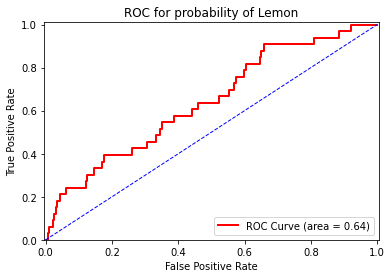

In [ ]:
# Importing the "pyplot" package of "matplotlib" library of python to generate
# graphs and plot curves:
import matplotlib.pyplot as plt

# The following line will tell Jupyter Notebook to keep the figures inside the explorer page
# rather than openng a new figure window:
%matplotlib inline

plt.figure()

# Roc Curve:
plt.plot(fpr, tpr, color='red', lw=2, label='ROC Curve (area = %0.2f)' % AUC)

# Random Guess line:
plt.plot([0, 1], [0, 1], color='blue', lw=1, linestyle='--')

# Defining The Range of X-Axis and Y-Axis:
plt.xlim([-0.005, 1.005])
plt.ylim([0.0, 1.01])

# Labels, Title, Legend:
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC for probability of Lemon')
plt.legend(loc="lower right")

plt.show()

Interesting observation as in our given training data 125 cars are labeled as bad buys and 3151 cars as not bad buys. This shows that from all the testing data only about 4% of cars are considered bad buys. Showing the importance of the ROC curve in comparison to just a regular accuracy test.

In [ ]:
from   sklearn.ensemble    import    RandomForestClassifier

my_RandomForest = RandomForestClassifier(n_estimators = 19, bootstrap = True, random_state=3)
my_RandomForest.fit(X_train, y_train)

RandomForestClassifier(n_estimators=19, random_state=3)

In [ ]:
my_RandomForest_predict = my_RandomForest.predict(X_test)

In [ ]:
accuracy_myrf = accuracy_score(y_test, my_RandomForest_predict)
print(accuracy_myrf)

0.9584859584859585


In [ ]:
# use count() and sort()
freq_df = training_df.groupby(['IsBadBuy'])['Model'].count().reset_index(
  name='Count').sort_values(['Count'], ascending=False)

# print dataframe
print(freq_df)
print(freq_df.shape)

   IsBadBuy  Count
0         0   3151
1         1    125
(2, 2)


Categorical Features number
*   Auction: 3
*   Make: 28
*   Model: 232
*   Trim: 90
*   SubModel: 356
*   Color: 16
*   Transmission: 2
*   Nationality: 4
*   Size: 12
*   TopThreeAmericanName: 4
*   PRIMEUNIT: 2
*   AUCGUART: 2
*   VNST: 35
*   WheelType: 3

In [ ]:
#OHE Only with categories without too many types of categories

category_columns = ['Auction', 'Color', 'Transmission', 'Nationality', 'Size', 'TopThreeAmericanName', 'PRIMEUNIT', 'AUCGUART', 'WheelType']
ohe_df = pd.get_dummies(training_df, columns = category_columns)
ohe_df.head()

,RefId,IsBadBuy,PurchDate,VehYear,VehicleAge,Make,Model,Trim,SubModel,WheelTypeID,...,TopThreeAmericanName_FORD,TopThreeAmericanName_GM,TopThreeAmericanName_OTHER,PRIMEUNIT_NO,PRIMEUNIT_YES,AUCGUART_GREEN,AUCGUART_RED,WheelType_Alloy,WheelType_Covers,WheelType_Special
275,276,0,10/4/2010,2003,7,HYUNDAI,ACCENT,GL,4D SEDAN GL,2.0,...,0,0,1,1,0,1,0,0,1,0
290,291,0,10/11/2010,2005,5,CHEVROLET,1500 SILVERADO PICKU,Bas,REG CAB 4.3L,1.0,...,0,1,0,1,0,1,0,1,0,0
297,298,0,10/18/2010,2006,4,CHEVROLET,EQUINOX FWD V6,LS,4D SUV LS,2.0,...,0,1,0,1,0,1,0,0,1,0
305,306,0,10/25/2010,2004,6,CHRYSLER,PT CRUISER,Bas,4D SEDAN,2.0,...,0,0,0,1,0,1,0,0,1,0
314,315,0,10/25/2010,2002,8,MERCURY,SABLE,LS,4D SEDAN LS PREMIUM,1.0,...,1,0,0,1,0,1,0,1,0,0


In [ ]:
X_ohe = ohe_df.drop(['IsBadBuy', 'PurchDate', 'Make', 'Model', 'Trim', 'SubModel', 'VNST'], axis = 1)
X_ohe.head()

,RefId,VehYear,VehicleAge,WheelTypeID,VehOdo,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,...,TopThreeAmericanName_FORD,TopThreeAmericanName_GM,TopThreeAmericanName_OTHER,PRIMEUNIT_NO,PRIMEUNIT_YES,AUCGUART_GREEN,AUCGUART_RED,WheelType_Alloy,WheelType_Covers,WheelType_Special
275,276,2003,7,2.0,55756,2089.0,3183.0,5030.0,7665.0,2307.0,...,0,0,1,1,0,1,0,0,1,0
290,291,2005,5,1.0,43795,4833.0,6545.0,8536.0,10540.0,5088.0,...,0,1,0,1,0,1,0,1,0,0
297,298,2006,4,2.0,63908,8210.0,9827.0,12160.0,13819.0,8055.0,...,0,1,0,1,0,1,0,0,1,0
305,306,2004,6,2.0,76895,3313.0,4370.0,6417.0,7699.0,3716.0,...,0,0,0,1,0,1,0,0,1,0
314,315,2002,8,1.0,94898,2756.0,3804.0,5665.0,7220.0,3314.0,...,1,0,0,1,0,1,0,1,0,0


In [ ]:
y_ohe = ohe_df['IsBadBuy']

y_ohe.head()

275    0
290    0
297    0
305    0
314    0
Name: IsBadBuy, dtype: int64

In [ ]:
X_train_ohe, X_test_ohe, y_train_ohe, y_test_ohe = train_test_split(X_ohe, y_ohe, test_size=0.25, random_state=6)

In [ ]:
knn_size3.fit(X_train_ohe, y_train_ohe)
y_predict_KNN = knn_size3.predict(X_test_ohe)
accuracy = accuracy_score(y_test_ohe, y_predict_KNN)

print(accuracy)

0.9560439560439561


Accuracy went slightly down with knn with OHE. I might have done something wrong. Test out other models and show their graphs. Try out Cross Validation.